# Data Analysis:

In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
from io import StringIO
import string
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords, wordnet
from nltk.stem import WordNetLemmatizer

In [81]:
with open(os.path.abspath('dataset/subtaskB_train.jsonl'), 'rb') as f:
    train_data = pd.read_json(f, lines=True)
with open(os.path.abspath('dataset/subtaskB_dev.jsonl'), 'rb') as f:
    dev_data = pd.read_json(f, lines=True)

In [82]:
train_data.head(10)

,text,model,source,label,id
0,Forza Motorsport is a popular racing game that provides players with the ability to race on vari...,chatGPT,wikihow,1,0
1,Buying Virtual Console games for your Nintendo Wii is a fun and easy process that can net you so...,chatGPT,wikihow,1,1
2,"Windows NT 4.0 was a popular operating system back in the day, and some still prefer it for use ...",chatGPT,wikihow,1,2
3,How to Make Perfume\n\nPerfume is a great way to enhance your personal scent and create a signat...,chatGPT,wikihow,1,3
4,How to Convert Song Lyrics to a Song'\n\nConverting your song lyrics into a full-fledged song ca...,chatGPT,wikihow,1,4
5,"How to Fix a Broken Window in a Wooden Frame\n\nIf you have a broken window in a wooden frame, d...",chatGPT,wikihow,1,5
6,Publishing your WordPress theme on Themeforest can be a lucrative business opportunity for web d...,chatGPT,wikihow,1,6
7,"Building a Railroad Tie Retaining Wall can be a daunting task, but with the proper tools and tec...",chatGPT,wikihow,1,7
8,Teaching your dog new tricks is a great way to bond with your furry friend and keep him mentally...,chatGPT,wikihow,1,8
9,Remote Desktop is a useful tool that allows you to connect to another computer from a different ...,chatGPT,wikihow,1,9


In [83]:
train_data.shape

(71027, 5)

In [84]:
train_data.model.value_counts(dropna=False, normalize=True)

model
davinci    0.168936
bloomz     0.168922
human      0.168908
chatGPT    0.168879
dolly      0.164754
cohere     0.159601
Name: proportion, dtype: float64

In [85]:
dev_data.model.value_counts(dropna=False, normalize=True)

model
chatGPT    0.166667
human      0.166667
davinci    0.166667
cohere     0.166667
bloomz     0.166667
dolly      0.166667
Name: proportion, dtype: float64

In [86]:
id2label = {0: 'human', 1: 'chatGPT', 2: 'cohere', 3: 'davinci', 4: 'bloomz', 5: 'dolly'}
label2id = {'human': 0, 'chatGPT': 1,'cohere': 2, 'davinci': 3, 'bloomz': 4, 'dolly': 5}

# Pre Processing for Analysis:

In [87]:
# removing punctuations and tokenizing:
sep = '|'
punctuation_chars = '!"#$%&\'()*+,-./:;<=>?@[\\]^_`{}~'
mapping_table = str.maketrans(dict.fromkeys(punctuation_chars, ''))
train_data['no_punc'] = train_data['text'].apply(lambda x: sep.join(x.translate(mapping_table).split()).split(sep))
train_data.head()

,text,model,source,label,id,no_punc
0,Forza Motorsport is a popular racing game that provides players with the ability to race on vari...,chatGPT,wikihow,1,0,"[Forza, Motorsport, is, a, popular, racing, game, that, provides, players, with, the, ability, t..."
1,Buying Virtual Console games for your Nintendo Wii is a fun and easy process that can net you so...,chatGPT,wikihow,1,1,"[Buying, Virtual, Console, games, for, your, Nintendo, Wii, is, a, fun, and, easy, process, that..."
2,"Windows NT 4.0 was a popular operating system back in the day, and some still prefer it for use ...",chatGPT,wikihow,1,2,"[Windows, NT, 40, was, a, popular, operating, system, back, in, the, day, and, some, still, pref..."
3,How to Make Perfume\n\nPerfume is a great way to enhance your personal scent and create a signat...,chatGPT,wikihow,1,3,"[How, to, Make, Perfume, Perfume, is, a, great, way, to, enhance, your, personal, scent, and, cr..."
4,How to Convert Song Lyrics to a Song'\n\nConverting your song lyrics into a full-fledged song ca...,chatGPT,wikihow,1,4,"[How, to, Convert, Song, Lyrics, to, a, Song, Converting, your, song, lyrics, into, a, fullfledg..."


In [88]:
# Converting to Lower Case: 
train_data['lower'] = train_data['no_punc'].apply(lambda x: [word.lower() for word in x])
train_data.head()

,text,model,source,label,id,no_punc,lower
0,Forza Motorsport is a popular racing game that provides players with the ability to race on vari...,chatGPT,wikihow,1,0,"[Forza, Motorsport, is, a, popular, racing, game, that, provides, players, with, the, ability, t...","[forza, motorsport, is, a, popular, racing, game, that, provides, players, with, the, ability, t..."
1,Buying Virtual Console games for your Nintendo Wii is a fun and easy process that can net you so...,chatGPT,wikihow,1,1,"[Buying, Virtual, Console, games, for, your, Nintendo, Wii, is, a, fun, and, easy, process, that...","[buying, virtual, console, games, for, your, nintendo, wii, is, a, fun, and, easy, process, that..."
2,"Windows NT 4.0 was a popular operating system back in the day, and some still prefer it for use ...",chatGPT,wikihow,1,2,"[Windows, NT, 40, was, a, popular, operating, system, back, in, the, day, and, some, still, pref...","[windows, nt, 40, was, a, popular, operating, system, back, in, the, day, and, some, still, pref..."
3,How to Make Perfume\n\nPerfume is a great way to enhance your personal scent and create a signat...,chatGPT,wikihow,1,3,"[How, to, Make, Perfume, Perfume, is, a, great, way, to, enhance, your, personal, scent, and, cr...","[how, to, make, perfume, perfume, is, a, great, way, to, enhance, your, personal, scent, and, cr..."
4,How to Convert Song Lyrics to a Song'\n\nConverting your song lyrics into a full-fledged song ca...,chatGPT,wikihow,1,4,"[How, to, Convert, Song, Lyrics, to, a, Song, Converting, your, song, lyrics, into, a, fullfledg...","[how, to, convert, song, lyrics, to, a, song, converting, your, song, lyrics, into, a, fullfledg..."


In [89]:
# removing stop words:
stop_words = set(stopwords.words('english'))
train_data['stopwords_removed'] = train_data['lower'].apply(lambda x: [word for word in x if word not in stop_words])
train_data.head()

,text,model,source,label,id,no_punc,lower,stopwords_removed
0,Forza Motorsport is a popular racing game that provides players with the ability to race on vari...,chatGPT,wikihow,1,0,"[Forza, Motorsport, is, a, popular, racing, game, that, provides, players, with, the, ability, t...","[forza, motorsport, is, a, popular, racing, game, that, provides, players, with, the, ability, t...","[forza, motorsport, popular, racing, game, provides, players, ability, race, various, tracks, di..."
1,Buying Virtual Console games for your Nintendo Wii is a fun and easy process that can net you so...,chatGPT,wikihow,1,1,"[Buying, Virtual, Console, games, for, your, Nintendo, Wii, is, a, fun, and, easy, process, that...","[buying, virtual, console, games, for, your, nintendo, wii, is, a, fun, and, easy, process, that...","[buying, virtual, console, games, nintendo, wii, fun, easy, process, net, classic, games, play, ..."
2,"Windows NT 4.0 was a popular operating system back in the day, and some still prefer it for use ...",chatGPT,wikihow,1,2,"[Windows, NT, 40, was, a, popular, operating, system, back, in, the, day, and, some, still, pref...","[windows, nt, 40, was, a, popular, operating, system, back, in, the, day, and, some, still, pref...","[windows, nt, 40, popular, operating, system, back, day, still, prefer, use, today, youre, looki..."
3,How to Make Perfume\n\nPerfume is a great way to enhance your personal scent and create a signat...,chatGPT,wikihow,1,3,"[How, to, Make, Perfume, Perfume, is, a, great, way, to, enhance, your, personal, scent, and, cr...","[how, to, make, perfume, perfume, is, a, great, way, to, enhance, your, personal, scent, and, cr...","[make, perfume, perfume, great, way, enhance, personal, scent, create, signature, fragrance, her..."
4,How to Convert Song Lyrics to a Song'\n\nConverting your song lyrics into a full-fledged song ca...,chatGPT,wikihow,1,4,"[How, to, Convert, Song, Lyrics, to, a, Song, Converting, your, song, lyrics, into, a, fullfledg...","[how, to, convert, song, lyrics, to, a, song, converting, your, song, lyrics, into, a, fullfledg...","[convert, song, lyrics, song, converting, song, lyrics, fullfledged, song, exciting, fulfilling,..."


In [90]:
# give pos tags:

train_data['pos_tags'] = train_data['stopwords_removed'].apply(nltk.tag.pos_tag)
train_data.head()

,text,model,source,label,id,no_punc,lower,stopwords_removed,pos_tags
0,Forza Motorsport is a popular racing game that provides players with the ability to race on vari...,chatGPT,wikihow,1,0,"[Forza, Motorsport, is, a, popular, racing, game, that, provides, players, with, the, ability, t...","[forza, motorsport, is, a, popular, racing, game, that, provides, players, with, the, ability, t...","[forza, motorsport, popular, racing, game, provides, players, ability, race, various, tracks, di...","[(forza, NN), (motorsport, NN), (popular, JJ), (racing, NN), (game, NN), (provides, VBZ), (playe..."
1,Buying Virtual Console games for your Nintendo Wii is a fun and easy process that can net you so...,chatGPT,wikihow,1,1,"[Buying, Virtual, Console, games, for, your, Nintendo, Wii, is, a, fun, and, easy, process, that...","[buying, virtual, console, games, for, your, nintendo, wii, is, a, fun, and, easy, process, that...","[buying, virtual, console, games, nintendo, wii, fun, easy, process, net, classic, games, play, ...","[(buying, VBG), (virtual, JJ), (console, JJ), (games, NNS), (nintendo, JJ), (wii, JJ), (fun, NN)..."
2,"Windows NT 4.0 was a popular operating system back in the day, and some still prefer it for use ...",chatGPT,wikihow,1,2,"[Windows, NT, 40, was, a, popular, operating, system, back, in, the, day, and, some, still, pref...","[windows, nt, 40, was, a, popular, operating, system, back, in, the, day, and, some, still, pref...","[windows, nt, 40, popular, operating, system, back, day, still, prefer, use, today, youre, looki...","[(windows, NNS), (nt, VBP), (40, CD), (popular, JJ), (operating, NN), (system, NN), (back, RB), ..."
3,How to Make Perfume\n\nPerfume is a great way to enhance your personal scent and create a signat...,chatGPT,wikihow,1,3,"[How, to, Make, Perfume, Perfume, is, a, great, way, to, enhance, your, personal, scent, and, cr...","[how, to, make, perfume, perfume, is, a, great, way, to, enhance, your, personal, scent, and, cr...","[make, perfume, perfume, great, way, enhance, personal, scent, create, signature, fragrance, her...","[(make, VB), (perfume, NN), (perfume, NN), (great, JJ), (way, NN), (enhance, NN), (personal, JJ)..."
4,How to Convert Song Lyrics to a Song'\n\nConverting your song lyrics into a full-fledged song ca...,chatGPT,wikihow,1,4,"[How, to, Convert, Song, Lyrics, to, a, Song, Converting, your, song, lyrics, into, a, fullfledg...","[how, to, convert, song, lyrics, to, a, song, converting, your, song, lyrics, into, a, fullfledg...","[convert, song, lyrics, song, converting, song, lyrics, fullfledged, song, exciting, fulfilling,...","[(convert, NN), (song, NN), (lyrics, NNS), (song, JJ), (converting, VBG), (song, NN), (lyrics, N..."


In [91]:
# add wordnet pos tags:
def get_wordnet_pos(tag):
    if tag.startswith('J'):
        return wordnet.ADJ
    elif tag.startswith('V'):
        return wordnet.VERB
    elif tag.startswith('N'):
        return wordnet.NOUN
    elif tag.startswith('R'):
        return wordnet.ADV
    else:
        return wordnet.NOUN
train_data['wordnet_pos'] = train_data['pos_tags'].apply(lambda x: [(word, get_wordnet_pos(pos_tag)) for (word, pos_tag) in x])
train_data.head()

,text,model,source,label,id,no_punc,lower,stopwords_removed,pos_tags,wordnet_pos
0,Forza Motorsport is a popular racing game that provides players with the ability to race on vari...,chatGPT,wikihow,1,0,"[Forza, Motorsport, is, a, popular, racing, game, that, provides, players, with, the, ability, t...","[forza, motorsport, is, a, popular, racing, game, that, provides, players, with, the, ability, t...","[forza, motorsport, popular, racing, game, provides, players, ability, race, various, tracks, di...","[(forza, NN), (motorsport, NN), (popular, JJ), (racing, NN), (game, NN), (provides, VBZ), (playe...","[(forza, n), (motorsport, n), (popular, a), (racing, n), (game, n), (provides, v), (players, n),..."
1,Buying Virtual Console games for your Nintendo Wii is a fun and easy process that can net you so...,chatGPT,wikihow,1,1,"[Buying, Virtual, Console, games, for, your, Nintendo, Wii, is, a, fun, and, easy, process, that...","[buying, virtual, console, games, for, your, nintendo, wii, is, a, fun, and, easy, process, that...","[buying, virtual, console, games, nintendo, wii, fun, easy, process, net, classic, games, play, ...","[(buying, VBG), (virtual, JJ), (console, JJ), (games, NNS), (nintendo, JJ), (wii, JJ), (fun, NN)...","[(buying, v), (virtual, a), (console, a), (games, n), (nintendo, a), (wii, a), (fun, n), (easy, ..."
2,"Windows NT 4.0 was a popular operating system back in the day, and some still prefer it for use ...",chatGPT,wikihow,1,2,"[Windows, NT, 40, was, a, popular, operating, system, back, in, the, day, and, some, still, pref...","[windows, nt, 40, was, a, popular, operating, system, back, in, the, day, and, some, still, pref...","[windows, nt, 40, popular, operating, system, back, day, still, prefer, use, today, youre, looki...","[(windows, NNS), (nt, VBP), (40, CD), (popular, JJ), (operating, NN), (system, NN), (back, RB), ...","[(windows, n), (nt, v), (40, n), (popular, a), (operating, n), (system, n), (back, r), (day, n),..."
3,How to Make Perfume\n\nPerfume is a great way to enhance your personal scent and create a signat...,chatGPT,wikihow,1,3,"[How, to, Make, Perfume, Perfume, is, a, great, way, to, enhance, your, personal, scent, and, cr...","[how, to, make, perfume, perfume, is, a, great, way, to, enhance, your, personal, scent, and, cr...","[make, perfume, perfume, great, way, enhance, personal, scent, create, signature, fragrance, her...","[(make, VB), (perfume, NN), (perfume, NN), (great, JJ), (way, NN), (enhance, NN), (personal, JJ)...","[(make, v), (perfume, n), (perfume, n), (great, a), (way, n), (enhance, n), (personal, a), (scen..."
4,How to Convert Song Lyrics to a Song'\n\nConverting your song lyrics into a full-fledged song ca...,chatGPT,wikihow,1,4,"[How, to, Convert, Song, Lyrics, to, a, Song, Converting, your, song, lyrics, into, a, fullfledg...","[how, to, convert, song, lyrics, to, a, song, converting, your, song, lyrics, into, a, fullfledg...","[convert, song, lyrics, song, converting, song, lyrics, fullfledged, song, exciting, fulfilling,...","[(convert, NN), (song, NN), (lyrics, NNS), (song, JJ), (converting, VBG), (song, NN), (lyrics, N...","[(convert, n), (song, n), (lyrics, n), (song, a), (converting, v), (song, n), (lyrics, n), (full..."


In [92]:
# lemmatization: 
wnl = WordNetLemmatizer()
train_data['lemmatized'] = train_data['wordnet_pos'].apply(lambda x: [wnl.lemmatize(word, tag) for word, tag in x])
train_data.head()

,text,model,source,label,id,no_punc,lower,stopwords_removed,pos_tags,wordnet_pos,lemmatized
0,Forza Motorsport is a popular racing game that provides players with the ability to race on vari...,chatGPT,wikihow,1,0,"[Forza, Motorsport, is, a, popular, racing, game, that, provides, players, with, the, ability, t...","[forza, motorsport, is, a, popular, racing, game, that, provides, players, with, the, ability, t...","[forza, motorsport, popular, racing, game, provides, players, ability, race, various, tracks, di...","[(forza, NN), (motorsport, NN), (popular, JJ), (racing, NN), (game, NN), (provides, VBZ), (playe...","[(forza, n), (motorsport, n), (popular, a), (racing, n), (game, n), (provides, v), (players, n),...","[forza, motorsport, popular, racing, game, provide, player, ability, race, various, track, diffe..."
1,Buying Virtual Console games for your Nintendo Wii is a fun and easy process that can net you so...,chatGPT,wikihow,1,1,"[Buying, Virtual, Console, games, for, your, Nintendo, Wii, is, a, fun, and, easy, process, that...","[buying, virtual, console, games, for, your, nintendo, wii, is, a, fun, and, easy, process, that...","[buying, virtual, console, games, nintendo, wii, fun, easy, process, net, classic, games, play, ...","[(buying, VBG), (virtual, JJ), (console, JJ), (games, NNS), (nintendo, JJ), (wii, JJ), (fun, NN)...","[(buying, v), (virtual, a), (console, a), (games, n), (nintendo, a), (wii, a), (fun, n), (easy, ...","[buy, virtual, console, game, nintendo, wii, fun, easy, process, net, classic, game, play, conso..."
2,"Windows NT 4.0 was a popular operating system back in the day, and some still prefer it for use ...",chatGPT,wikihow,1,2,"[Windows, NT, 40, was, a, popular, operating, system, back, in, the, day, and, some, still, pref...","[windows, nt, 40, was, a, popular, operating, system, back, in, the, day, and, some, still, pref...","[windows, nt, 40, popular, operating, system, back, day, still, prefer, use, today, youre, looki...","[(windows, NNS), (nt, VBP), (40, CD), (popular, JJ), (operating, NN), (system, NN), (back, RB), ...","[(windows, n), (nt, v), (40, n), (popular, a), (operating, n), (system, n), (back, r), (day, n),...","[window, nt, 40, popular, operating, system, back, day, still, prefer, use, today, youre, look, ..."
3,How to Make Perfume\n\nPerfume is a great way to enhance your personal scent and create a signat...,chatGPT,wikihow,1,3,"[How, to, Make, Perfume, Perfume, is, a, great, way, to, enhance, your, personal, scent, and, cr...","[how, to, make, perfume, perfume, is, a, great, way, to, enhance, your, personal, scent, and, cr...","[make, perfume, perfume, great, way, enhance, personal, scent, create, signature, fragrance, her...","[(make, VB), (perfume, NN), (perfume, NN), (great, JJ), (way, NN), (enhance, NN), (personal, JJ)...","[(make, v), (perfume, n), (perfume, n), (great, a), (way, n), (enhance, n), (personal, a), (scen...","[make, perfume, perfume, great, way, enhance, personal, scent, create, signature, fragrance, her..."
4,How to Convert Song Lyrics to a Song'\n\nConverting your song lyrics into a full-fledged song ca...,chatGPT,wikihow,1,4,"[How, to, Convert, Song, Lyrics, to, a, Song, Converting, your, song, lyrics, into, a, fullfledg...","[how, to, convert, song, lyrics, to, a, song, converting, your, song, lyrics, into, a, fullfledg...","[convert, song, lyrics, song, converting, song, lyrics, fullfledged, song, exciting, fulfilling,...","[(convert, NN), (song, NN), (lyrics, NNS), (song, JJ), (converting, VBG), (song, NN), (lyrics, N...","[(convert, n), (song, n), (lyrics, n), (song, a), (converting, v), (song, n), (lyrics, n), (full...","[convert, song, lyric, song, convert, song, lyric, fullfledged, song, exciting, fulfil, experien..."


# Analysis:

In [45]:
import pyLDAvis
from collections import Counter
from textblob import TextBlob
from nltk.probability import FreqDist
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import LatentDirichletAllocation, NMF
from wordcloud import WordCloud, ImageColorGenerator
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
pd.options.mode.chained_assignment = None
pd.set_option('display.max_colwidth', 100)

In [99]:
train_data['lemma_str'] = [' '.join(map(str,l)) for l in train_data['lemmatized']]
train_data.head()

,text,model,source,label,id,no_punc,lower,stopwords_removed,pos_tags,wordnet_pos,lemmatized,word_count,text_len,lemma_str
0,Forza Motorsport is a popular racing game that provides players with the ability to race on vari...,chatGPT,wikihow,1,0,"[Forza, Motorsport, is, a, popular, racing, game, that, provides, players, with, the, ability, t...","[forza, motorsport, is, a, popular, racing, game, that, provides, players, with, the, ability, t...","[forza, motorsport, popular, racing, game, provides, players, ability, race, various, tracks, di...","[(forza, NN), (motorsport, NN), (popular, JJ), (racing, NN), (game, NN), (provides, VBZ), (playe...","[(forza, n), (motorsport, n), (popular, a), (racing, n), (game, n), (provides, v), (players, n),...","[forza, motorsport, popular, racing, game, provide, player, ability, race, various, track, diffe...",407,2244,forza motorsport popular racing game provide player ability race various track different vehicle...
1,Buying Virtual Console games for your Nintendo Wii is a fun and easy process that can net you so...,chatGPT,wikihow,1,1,"[Buying, Virtual, Console, games, for, your, Nintendo, Wii, is, a, fun, and, easy, process, that...","[buying, virtual, console, games, for, your, nintendo, wii, is, a, fun, and, easy, process, that...","[buying, virtual, console, games, nintendo, wii, fun, easy, process, net, classic, games, play, ...","[(buying, VBG), (virtual, JJ), (console, JJ), (games, NNS), (nintendo, JJ), (wii, JJ), (fun, NN)...","[(buying, v), (virtual, a), (console, a), (games, n), (nintendo, a), (wii, a), (fun, n), (easy, ...","[buy, virtual, console, game, nintendo, wii, fun, easy, process, net, classic, game, play, conso...",681,3728,buy virtual console game nintendo wii fun easy process net classic game play console simple step...
2,"Windows NT 4.0 was a popular operating system back in the day, and some still prefer it for use ...",chatGPT,wikihow,1,2,"[Windows, NT, 40, was, a, popular, operating, system, back, in, the, day, and, some, still, pref...","[windows, nt, 40, was, a, popular, operating, system, back, in, the, day, and, some, still, pref...","[windows, nt, 40, popular, operating, system, back, day, still, prefer, use, today, youre, looki...","[(windows, NNS), (nt, VBP), (40, CD), (popular, JJ), (operating, NN), (system, NN), (back, RB), ...","[(windows, n), (nt, v), (40, n), (popular, a), (operating, n), (system, n), (back, r), (day, n),...","[window, nt, 40, popular, operating, system, back, day, still, prefer, use, today, youre, look, ...",913,5237,window nt 40 popular operating system back day still prefer use today youre look install window ...
3,How to Make Perfume\n\nPerfume is a great way to enhance your personal scent and create a signat...,chatGPT,wikihow,1,3,"[How, to, Make, Perfume, Perfume, is, a, great, way, to, enhance, your, personal, scent, and, cr...","[how, to, make, perfume, perfume, is, a, great, way, to, enhance, your, personal, scent, and, cr...","[make, perfume, perfume, great, way, enhance, personal, scent, create, signature, fragrance, her...","[(make, VB), (perfume, NN), (perfume, NN), (great, JJ), (way, NN), (enhance, NN), (personal, JJ)...","[(make, v), (perfume, n), (perfume, n), (great, a), (way, n), (enhance, n), (personal, a), (scen...","[make, perfume, perfume, great, way, enhance, personal, scent, create, signature, fragrance, her...",797,4729,make perfume perfume great way enhance personal scent create signature fragrance here make perfu...
4,How to Convert Song Lyrics to a Song'\n\nConverting your song lyrics into a full-fledged song ca...,chatGPT,wikihow,1,4,"[How, to, Convert, Song, Lyrics, to, a, Song, Converting, your, song, lyrics, into, a, fullfledg...","[how, to, convert, song, lyrics, to, a, song, converting, your, song, lyrics, into, a, fullfledg...","[convert, song, lyrics, song, converting, song, lyrics, fullfledged, song, exciting, fulfilling,...","[(convert, NN), (song, NN), (lyrics, NNS), (song, JJ), (converting, VBG), (

In [93]:
train_data['word_count'] = train_data['lower'].apply(lambda x: len(str(x).split()))
train_data['text_len'] = train_data['text'].astype(str).apply(len)
train_data.head()

,text,model,source,label,id,no_punc,lower,stopwords_removed,pos_tags,wordnet_pos,lemmatized,word_count,text_len
0,Forza Motorsport is a popular racing game that provides players with the ability to race on vari...,chatGPT,wikihow,1,0,"[Forza, Motorsport, is, a, popular, racing, game, that, provides, players, with, the, ability, t...","[forza, motorsport, is, a, popular, racing, game, that, provides, players, with, the, ability, t...","[forza, motorsport, popular, racing, game, provides, players, ability, race, various, tracks, di...","[(forza, NN), (motorsport, NN), (popular, JJ), (racing, NN), (game, NN), (provides, VBZ), (playe...","[(forza, n), (motorsport, n), (popular, a), (racing, n), (game, n), (provides, v), (players, n),...","[forza, motorsport, popular, racing, game, provide, player, ability, race, various, track, diffe...",407,2244
1,Buying Virtual Console games for your Nintendo Wii is a fun and easy process that can net you so...,chatGPT,wikihow,1,1,"[Buying, Virtual, Console, games, for, your, Nintendo, Wii, is, a, fun, and, easy, process, that...","[buying, virtual, console, games, for, your, nintendo, wii, is, a, fun, and, easy, process, that...","[buying, virtual, console, games, nintendo, wii, fun, easy, process, net, classic, games, play, ...","[(buying, VBG), (virtual, JJ), (console, JJ), (games, NNS), (nintendo, JJ), (wii, JJ), (fun, NN)...","[(buying, v), (virtual, a), (console, a), (games, n), (nintendo, a), (wii, a), (fun, n), (easy, ...","[buy, virtual, console, game, nintendo, wii, fun, easy, process, net, classic, game, play, conso...",681,3728
2,"Windows NT 4.0 was a popular operating system back in the day, and some still prefer it for use ...",chatGPT,wikihow,1,2,"[Windows, NT, 40, was, a, popular, operating, system, back, in, the, day, and, some, still, pref...","[windows, nt, 40, was, a, popular, operating, system, back, in, the, day, and, some, still, pref...","[windows, nt, 40, popular, operating, system, back, day, still, prefer, use, today, youre, looki...","[(windows, NNS), (nt, VBP), (40, CD), (popular, JJ), (operating, NN), (system, NN), (back, RB), ...","[(windows, n), (nt, v), (40, n), (popular, a), (operating, n), (system, n), (back, r), (day, n),...","[window, nt, 40, popular, operating, system, back, day, still, prefer, use, today, youre, look, ...",913,5237
3,How to Make Perfume\n\nPerfume is a great way to enhance your personal scent and create a signat...,chatGPT,wikihow,1,3,"[How, to, Make, Perfume, Perfume, is, a, great, way, to, enhance, your, personal, scent, and, cr...","[how, to, make, perfume, perfume, is, a, great, way, to, enhance, your, personal, scent, and, cr...","[make, perfume, perfume, great, way, enhance, personal, scent, create, signature, fragrance, her...","[(make, VB), (perfume, NN), (perfume, NN), (great, JJ), (way, NN), (enhance, NN), (personal, JJ)...","[(make, v), (perfume, n), (perfume, n), (great, a), (way, n), (enhance, n), (personal, a), (scen...","[make, perfume, perfume, great, way, enhance, personal, scent, create, signature, fragrance, her...",797,4729
4,How to Convert Song Lyrics to a Song'\n\nConverting your song lyrics into a full-fledged song ca...,chatGPT,wikihow,1,4,"[How, to, Convert, Song, Lyrics, to, a, Song, Converting, your, song, lyrics, into, a, fullfledg...","[how, to, convert, song, lyrics, to, a, song, converting, your, song, lyrics, into, a, fullfledg...","[convert, song, lyrics, song, converting, song, lyrics, fullfledged, song, exciting, fulfilling,...","[(convert, NN), (song, NN), (lyrics, NNS), (song, JJ), (converting, VBG), (song, NN), (lyrics, N...","[(convert, n), (song, n), (lyrics, n), (song, a), (converting, v), (song, n), (lyrics, n), (full...","[convert, song, lyric, song, convert, song, lyric, fullfledged, song, exciting, fulfil, experien...",569,3095


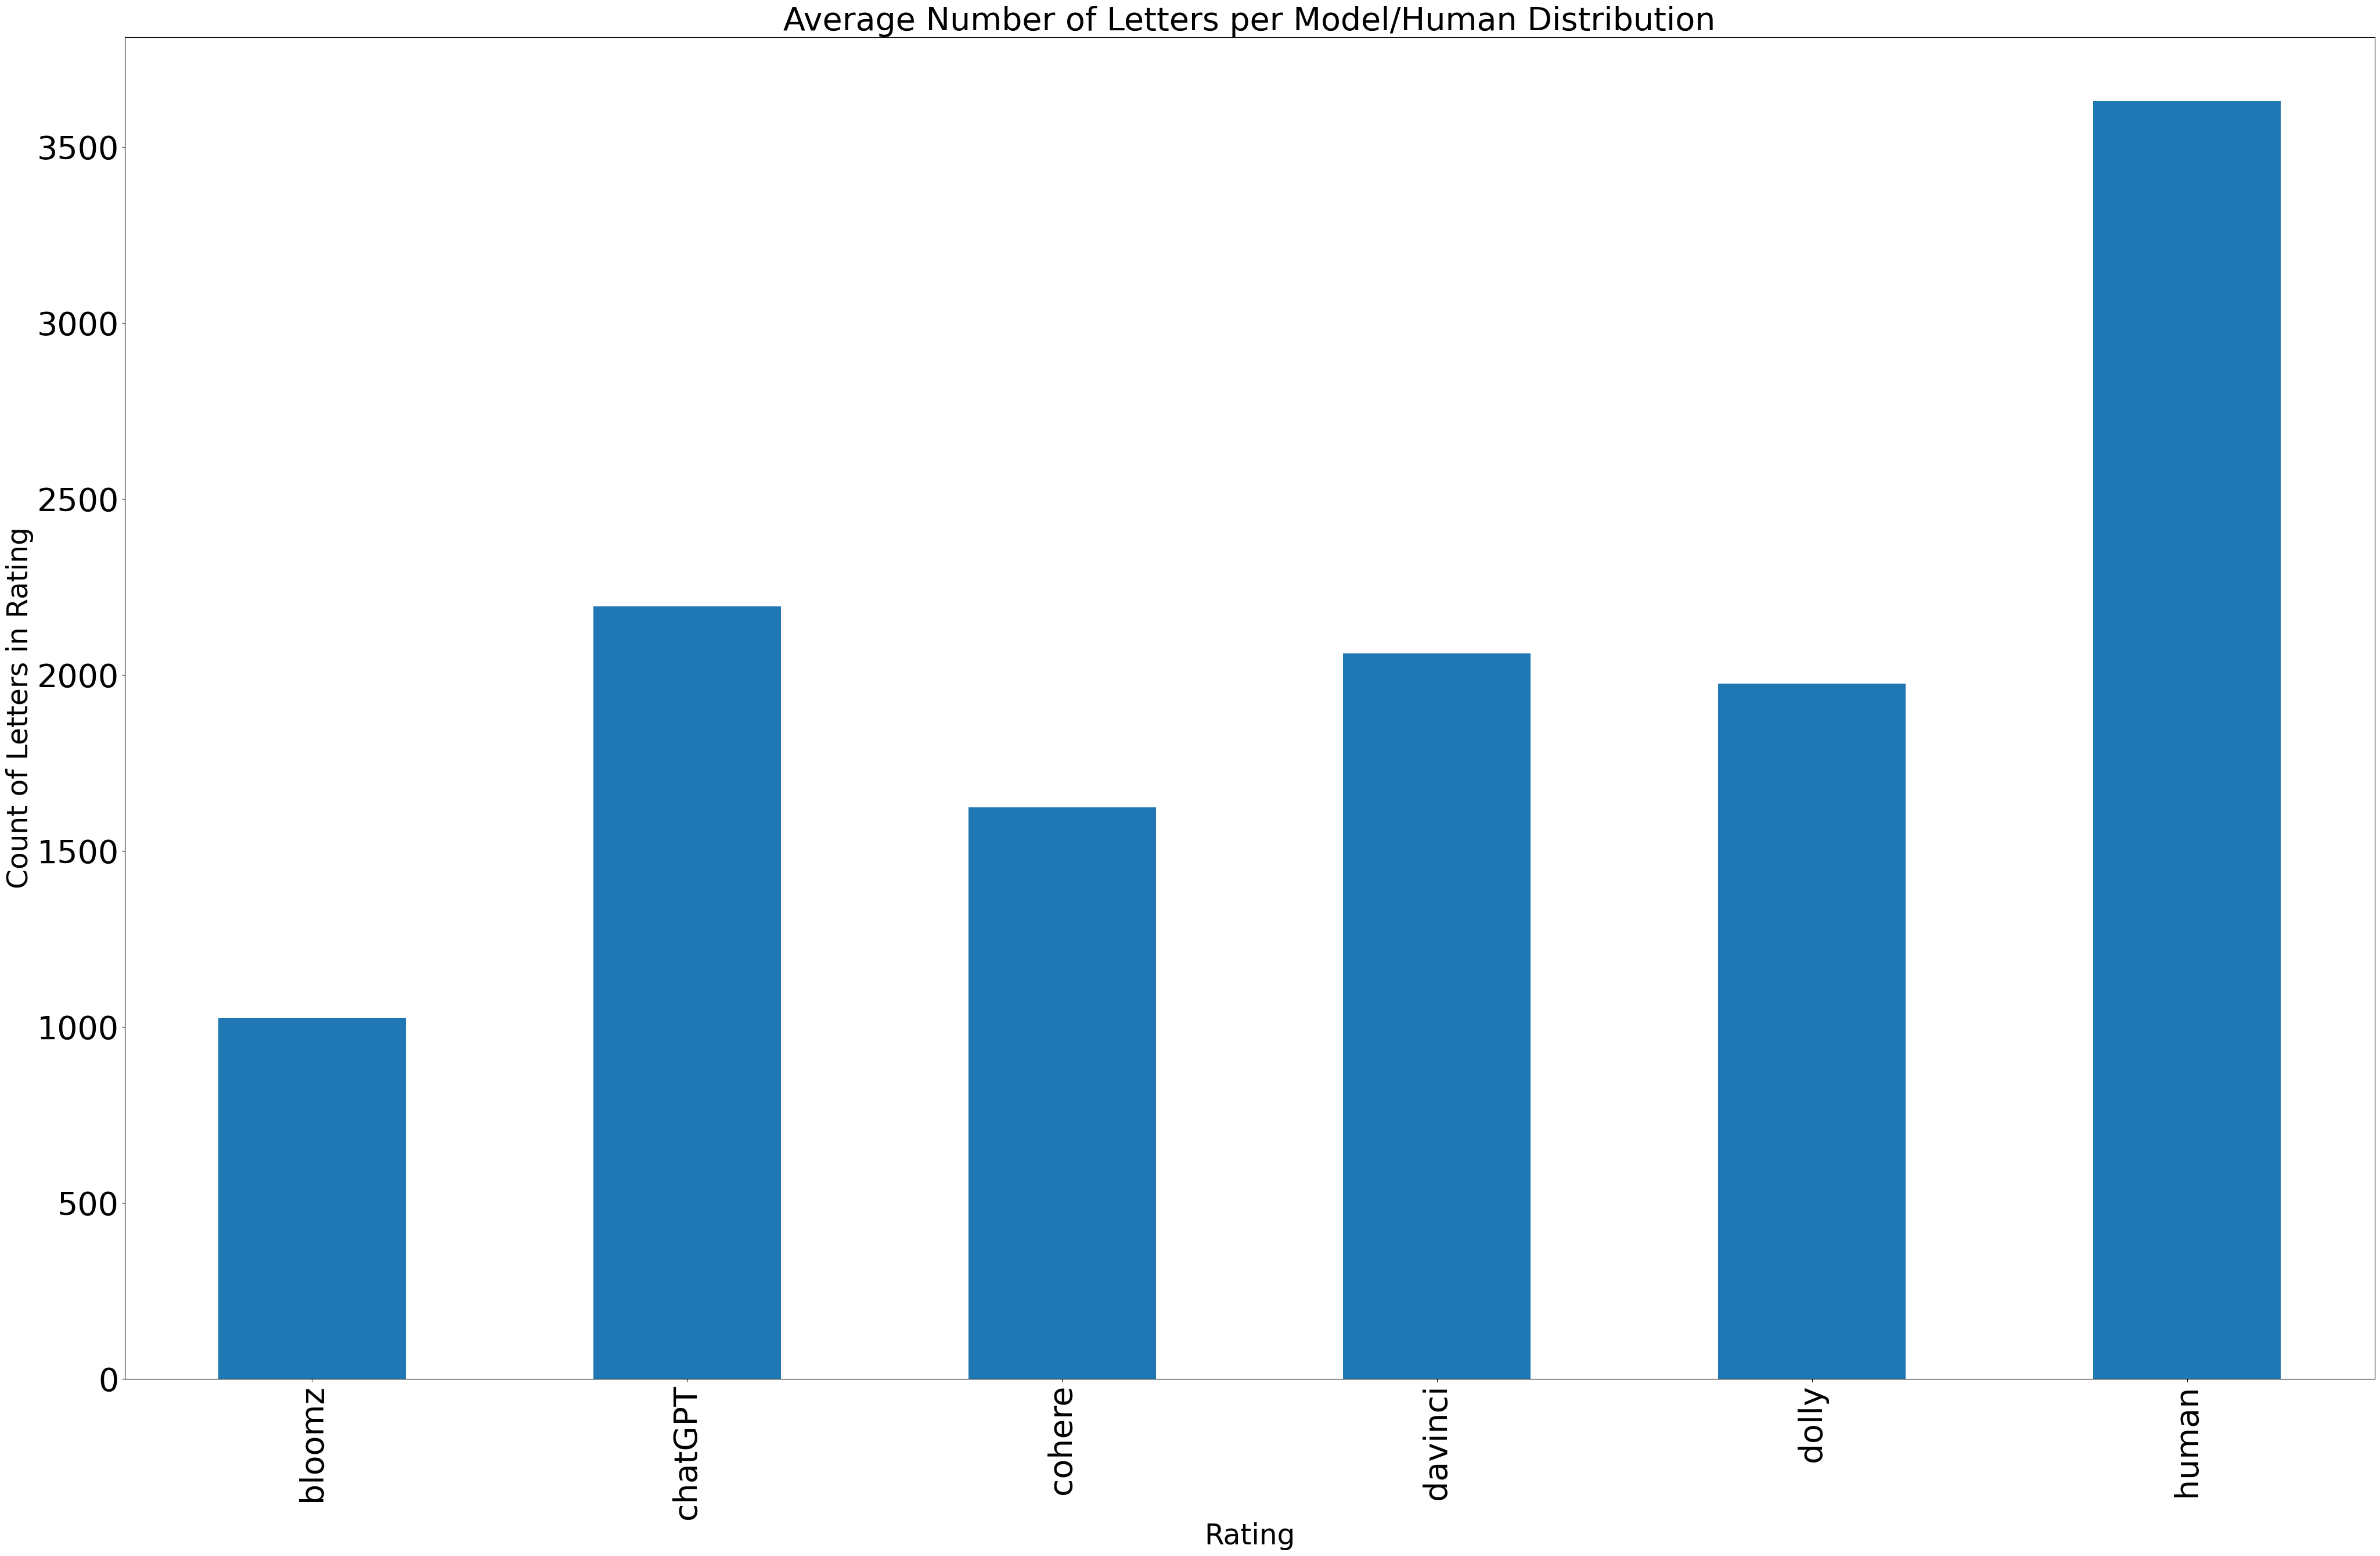

In [94]:
letter_avg = train_data.groupby('model')['text_len'].mean().plot(kind='bar', figsize=(50,30))
plt.xlabel('Rating', fontsize=35)
plt.ylabel('Count of Letters in Rating', fontsize=35)
plt.xticks(fontsize=40)
plt.yticks(fontsize=40)
plt.title('Average Number of Letters per Model/Human Distribution', fontsize=40)
plt.show()

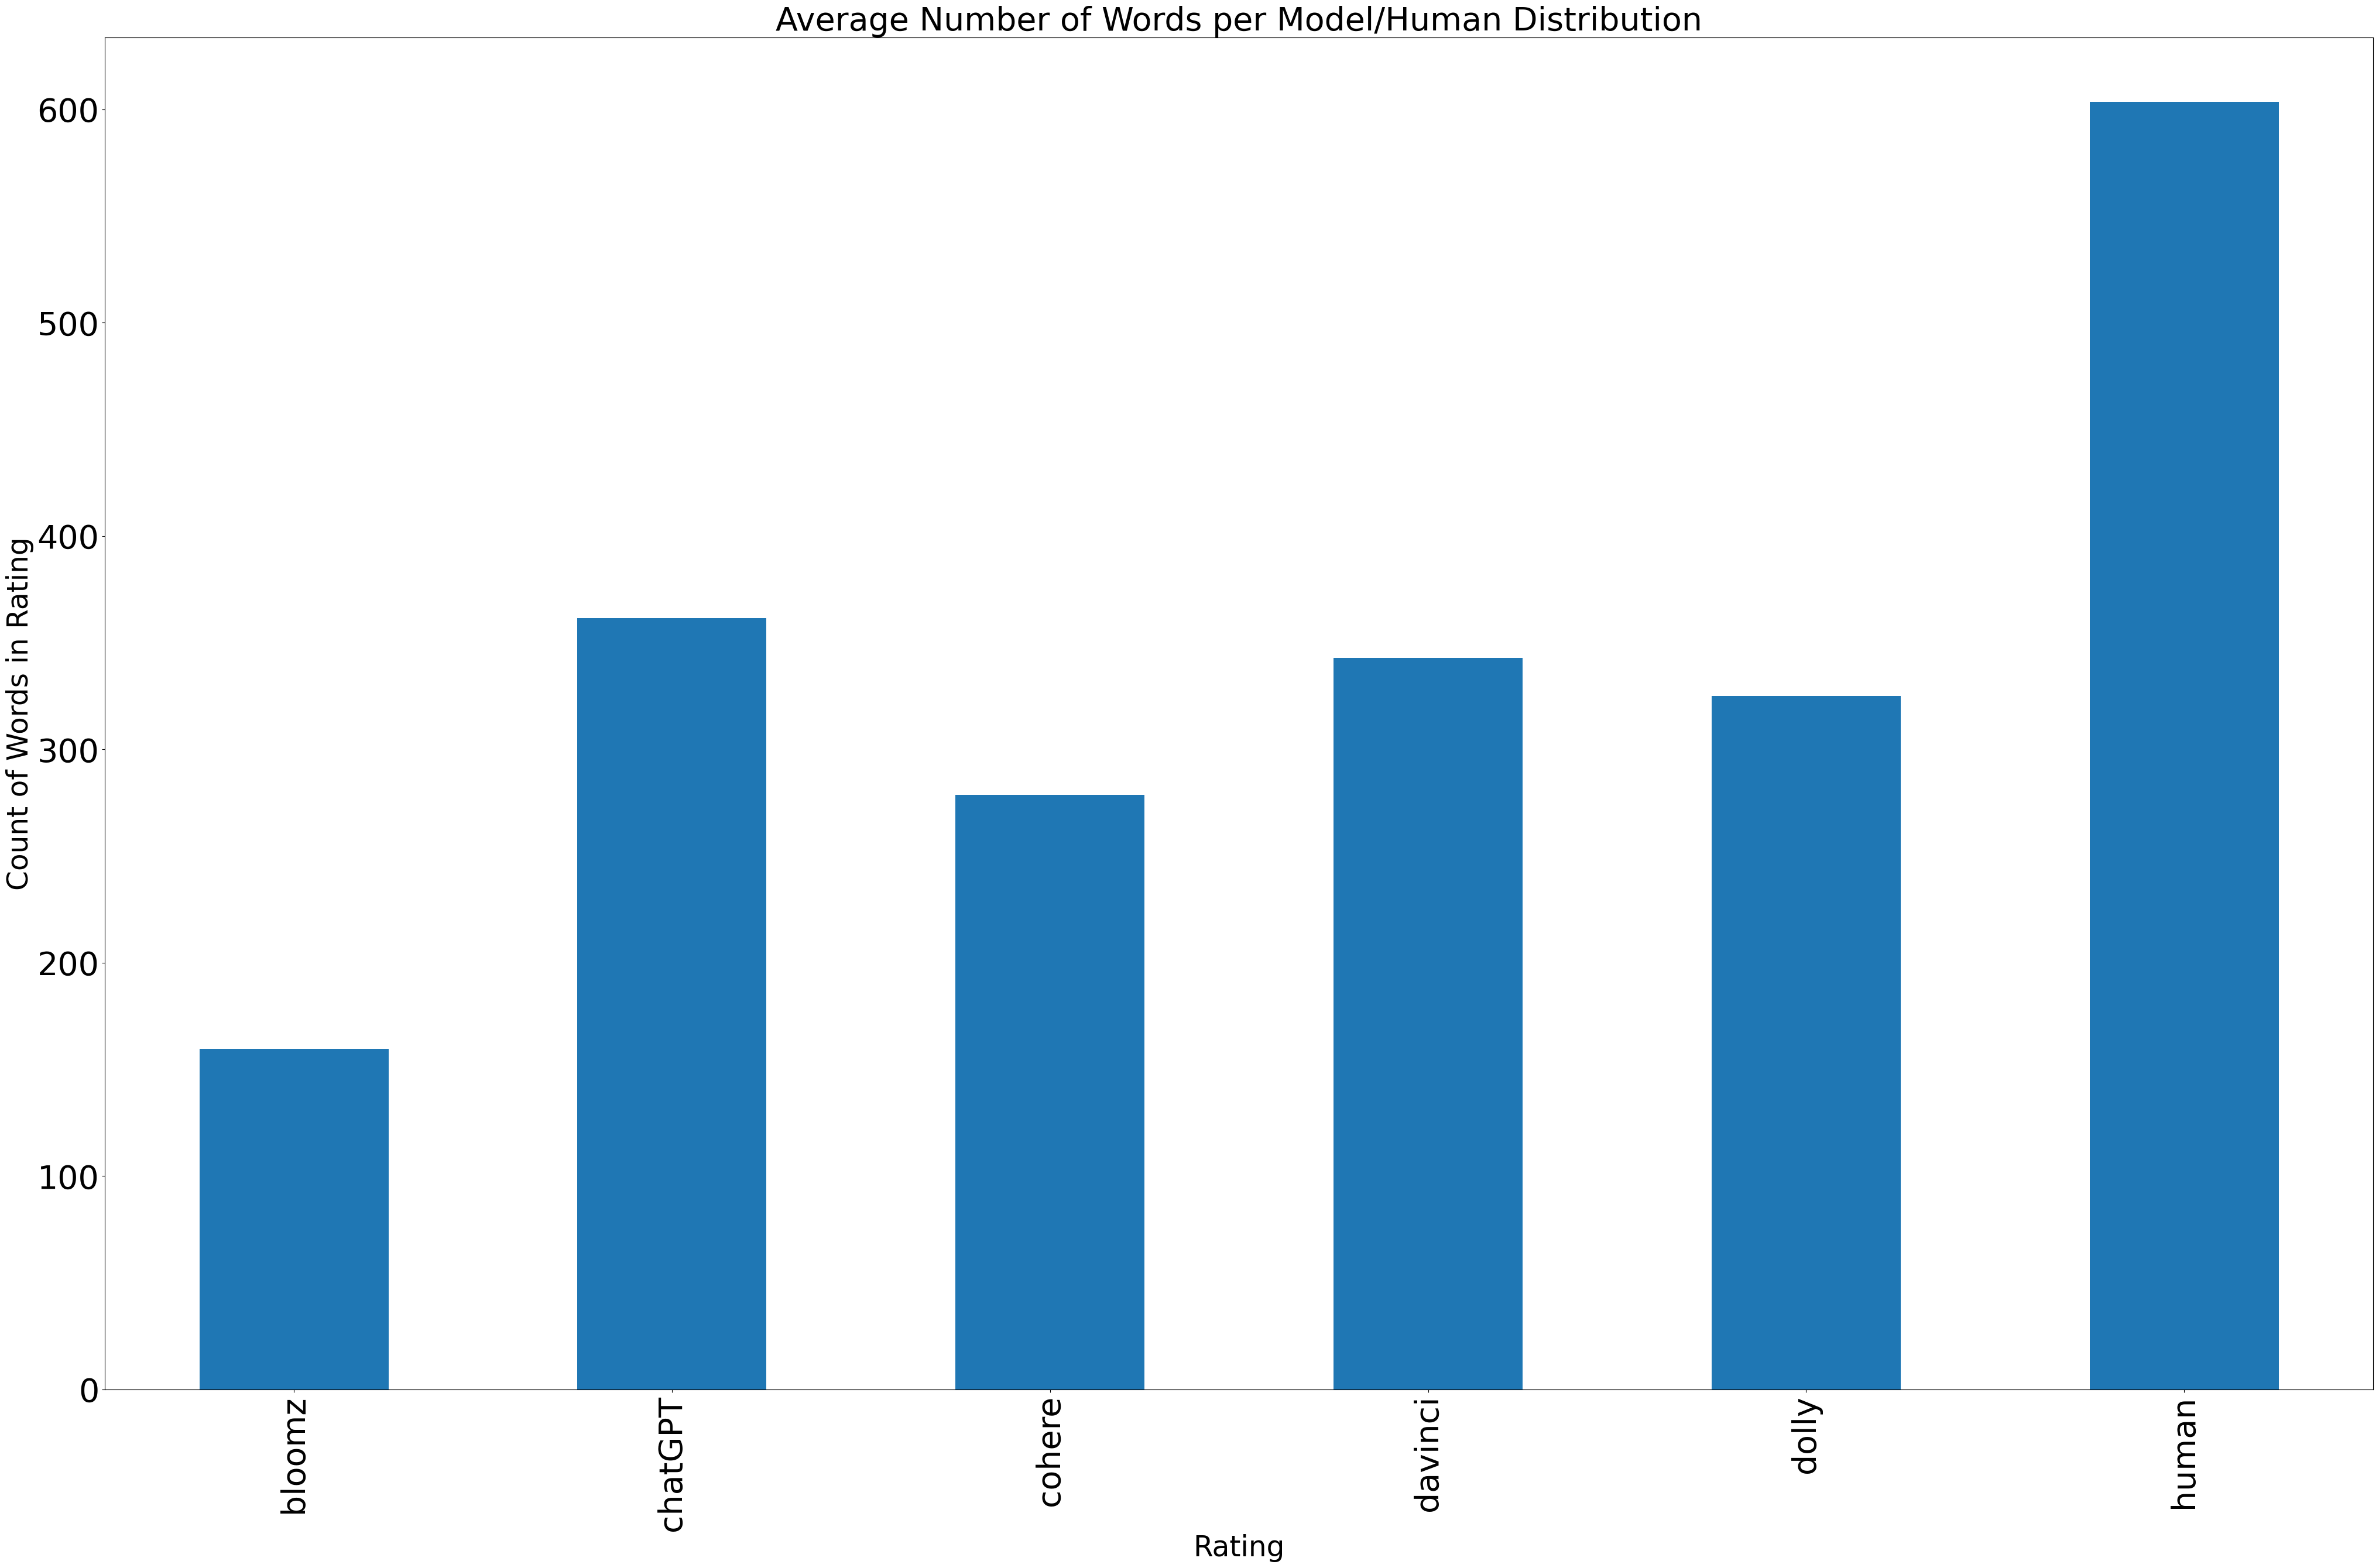

In [95]:
word_avg = train_data.groupby('model')['word_count'].mean().plot(kind='bar', figsize=(50,30))
plt.xlabel('Rating', fontsize=35)
plt.ylabel('Count of Words in Rating', fontsize=35)
plt.xticks(fontsize=40)
plt.yticks(fontsize=40)
plt.title('Average Number of Words per Model/Human Distribution', fontsize=40)
plt.show()

In [96]:
words = train_data['lemmatized']
allwords = []
for wordlist in words:
    allwords += wordlist
len(allwords)

14005151

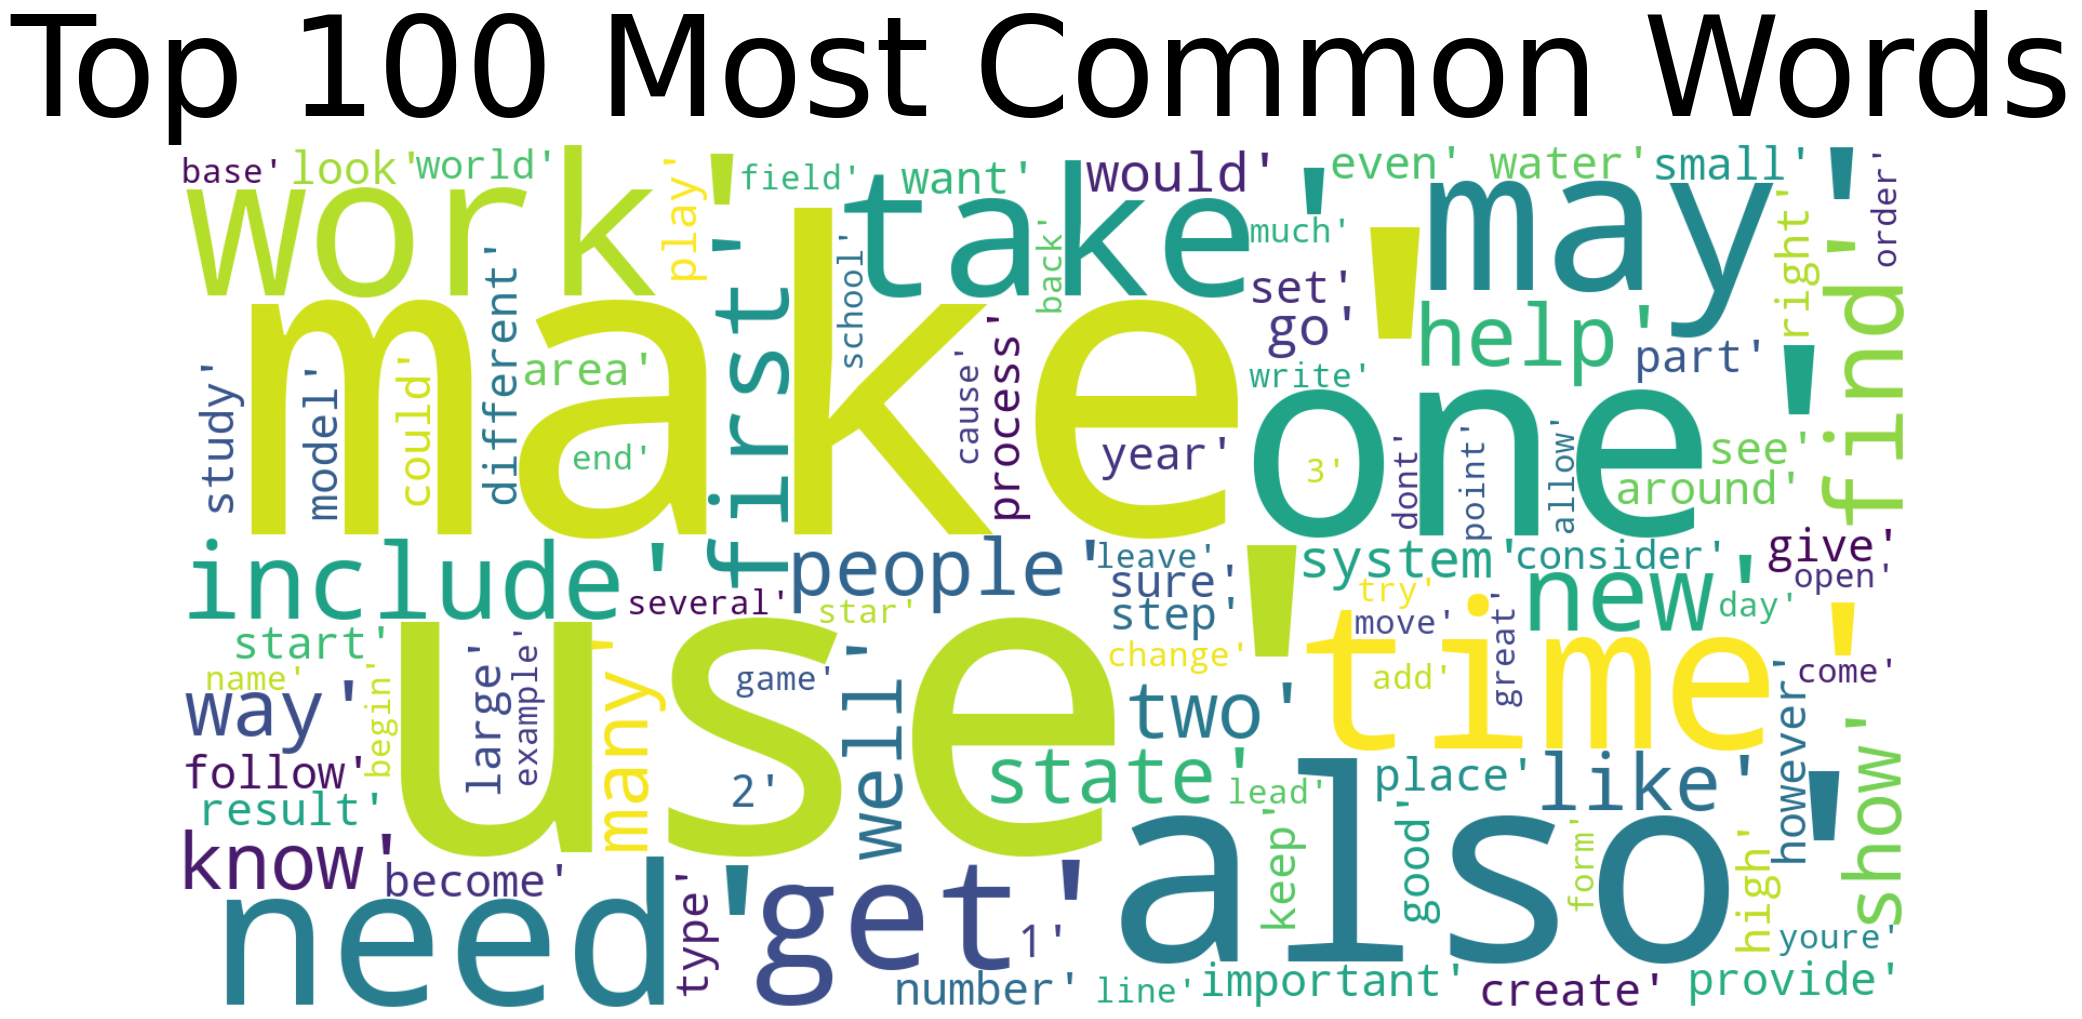

In [97]:
mostcommon = FreqDist(allwords).most_common(100)
wordcloud = WordCloud(width=1600, height=800, background_color='white').generate(str(mostcommon))
fig = plt.figure(figsize=(30,10), facecolor='white')
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.title('Top 100 Most Common Words', fontsize=100)
plt.tight_layout(pad=0)
plt.show()

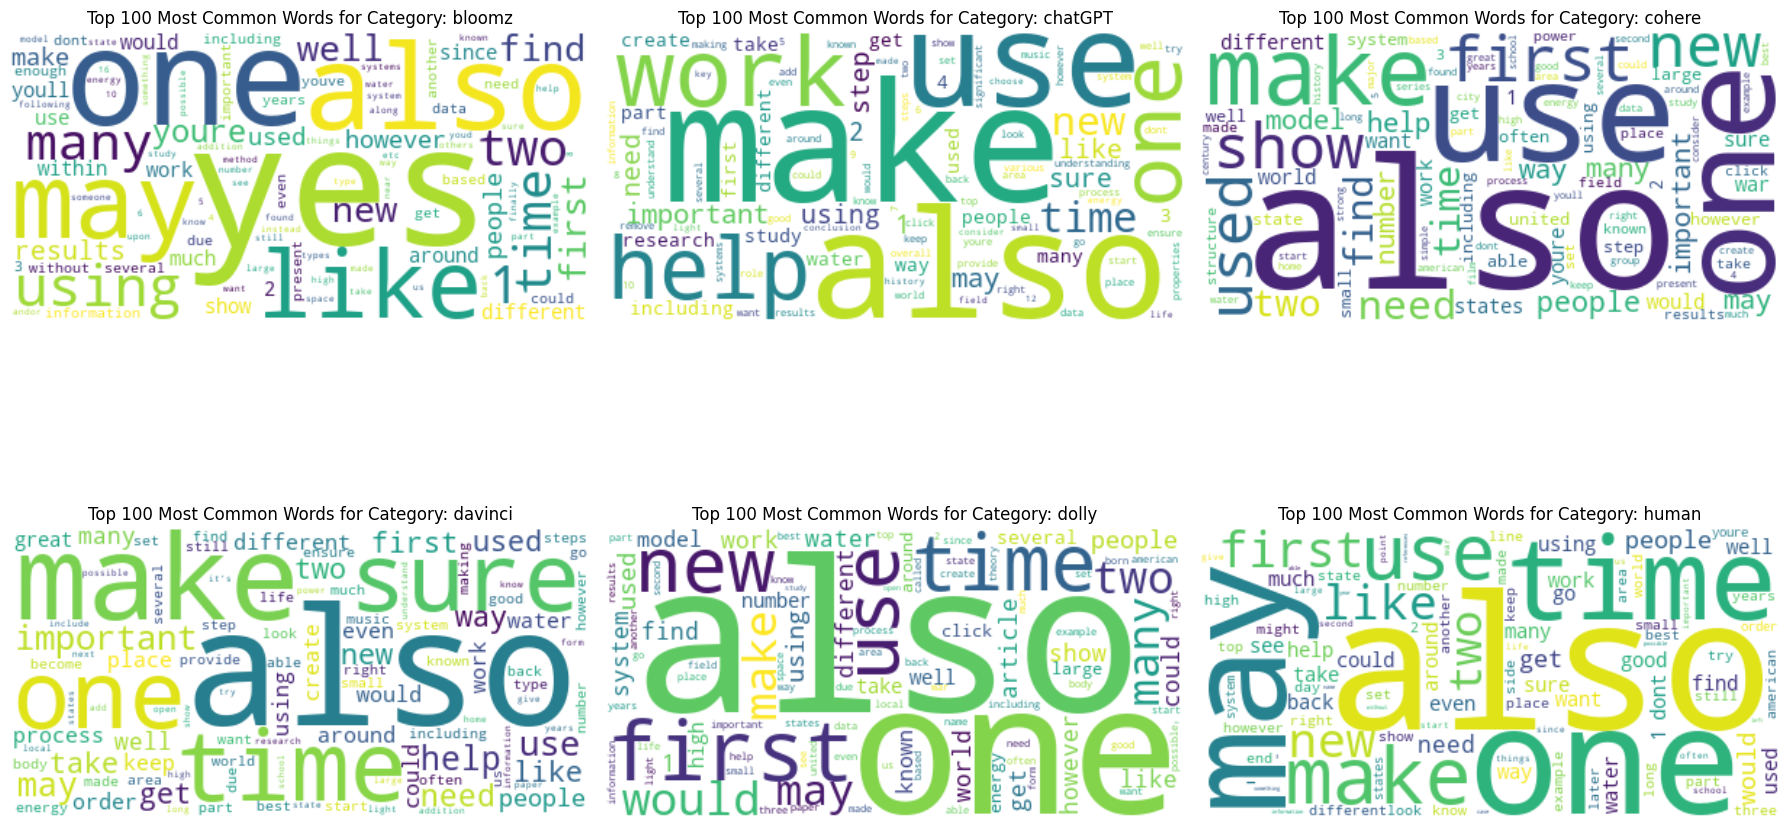

In [98]:
grouped = train_data.groupby('model')['stopwords_removed'].apply(list)
categories = grouped.index
num_rows = 2
num_cols = 3
total_plots = num_rows * num_cols
fig, axs = plt.subplots(num_rows, num_cols, figsize=(18, 12))
axs = axs.flatten()

for i, (category, words) in enumerate(grouped.items()):
    if i >= total_plots:
        break
    
    allwords = []
    for wordlist in words:
        allwords += wordlist

    mostcommon_category = Counter(allwords).most_common(100)
    wordcloud = WordCloud(width=400, height=200, background_color='white').generate_from_frequencies(dict(mostcommon_category))
    axs[i].imshow(wordcloud, interpolation="bilinear")
    axs[i].set_title(f'Top 100 Most Common Words for Category: {category}')
    axs[i].axis('off')

for i in range(len(categories), total_plots):
    fig.delaxes(axs[i])

plt.tight_layout()
plt.show()

C:\Users\Sai Anish\AppData\Local\Temp\ipykernel_10628\2570187288.py:19: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axs[i].set_xticklabels(words, rotation=60, fontsize=10)
C:\Users\Sai Anish\AppData\Local\Temp\ipykernel_10628\2570187288.py:19: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axs[i].set_xticklabels(words, rotation=60, fontsize=10)
C:\Users\Sai Anish\AppData\Local\Temp\ipykernel_10628\2570187288.py:19: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axs[i].set_xticklabels(words, rotation=60, fontsize=10)
C:\Users\Sai Anish\AppData\Local\Temp\ipykernel_10628\2570187288.py:19: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axs[i].set_xticklabels(w

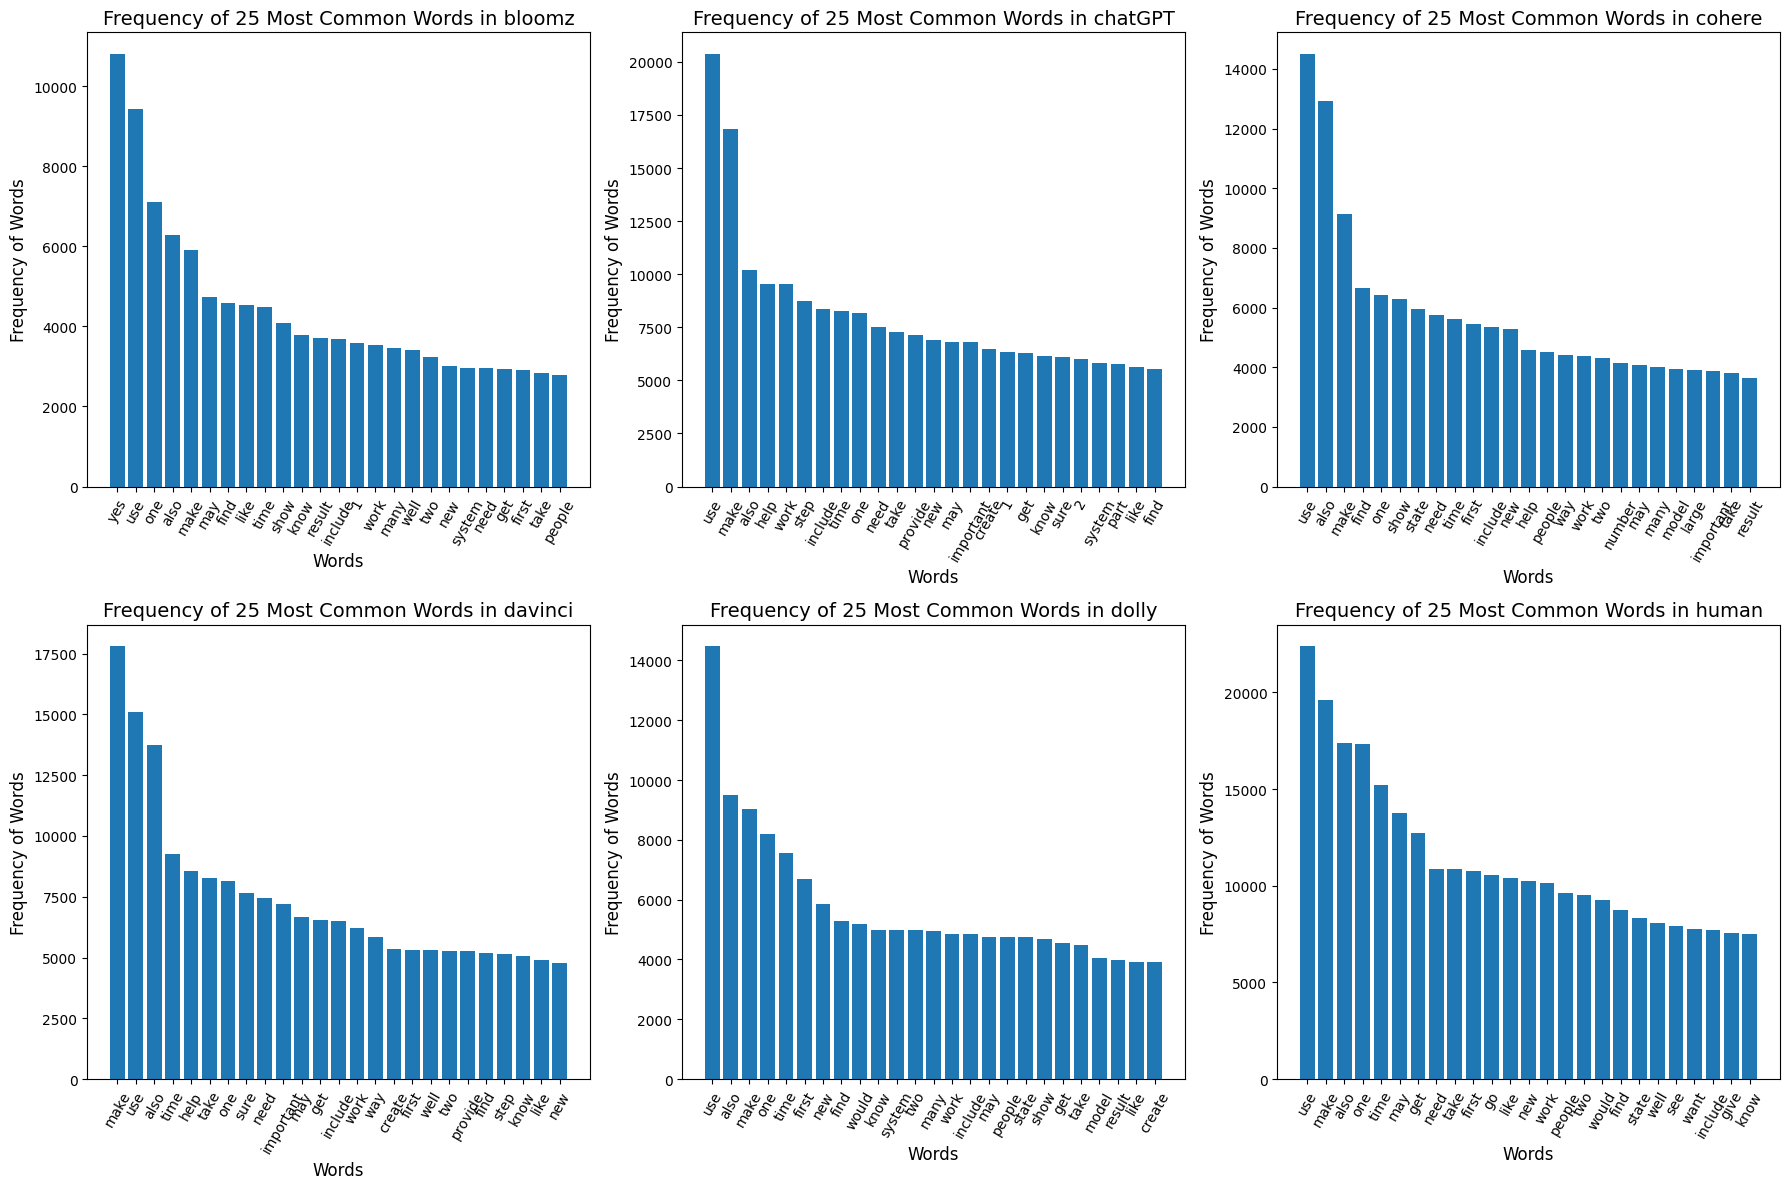

In [101]:
group_by = train_data.groupby('model')['lemma_str'].apply(lambda x: Counter(''.join(x).split()).most_common(25))
categories = group_by.index
num_rows = 2
num_cols = 3
total_plots = num_rows * num_cols
fig, axs = plt.subplots(num_rows, num_cols, figsize=(18, 12))
axs = axs.flatten()
for i, category in enumerate(categories):
    if i >= total_plots:
        break
    category_data = group_by[category]
    words = list(zip(*category_data))[0]
    freq = list(zip(*category_data))[1]

    axs[i].bar(words, freq)
    axs[i].set_xlabel('Words', fontsize=12)
    axs[i].set_ylabel('Frequency of Words', fontsize=12)
    axs[i].tick_params(axis='both', which='major', labelsize=10)
    axs[i].set_xticklabels(words, rotation=60, fontsize=10)
    axs[i].set_title(f'Frequency of 25 Most Common Words in {category}', fontsize=14)

for i in range(len(categories), total_plots):
    fig.delaxes(axs[i])

plt.tight_layout()
plt.show()

## Topic Modelling:

In [107]:
tf_vectorizer = CountVectorizer(max_df=0.9, min_df=25, max_features=5000)
tf = tf_vectorizer.fit_transform(train_data['lemma_str'].values)#.values.astype('U'))
tf_feature_names = tf_vectorizer.get_feature_names_out()
doc_term_matrix = pd.DataFrame(tf.toarray(), columns=list(tf_feature_names))
doc_term_matrix

,01,02,03,05,10,100,1000,10000,11,12,...,youll,young,youre,youth,youtube,youve,zealand,zero,zip,zone
0,0,0,0,0,1,0,0,0,1,1,...,0,0,1,0,0,0,0,0,0,0
1,0,0,0,0,2,0,0,0,1,1,...,2,0,3,0,0,2,0,0,0,0
2,0,0,0,0,1,0,0,0,1,1,...,0,0,1,0,0,1,0,0,0,2
3,0,0,0,0,0,0,0,0,0,0,...,3,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,4,0,0,6,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
71022,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
71023,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
71024,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
71025,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [114]:
def lda_for_category(category_data):
    tfidf_vectorizer = TfidfVectorizer(max_df=0.90, min_df =25, max_features=5000, use_idf=True)
    tfidf = tfidf_vectorizer.fit_transform(category_data)
    tfidf_feature_names = tfidf_vectorizer.get_feature_names_out()
    doc_term_matrix_tfidf = pd.DataFrame(tfidf.toarray(), columns=list(tfidf_feature_names))
    
    nmf = NMF(n_components=10, random_state=0, init='nndsvd').fit(tfidf)
    
    no_top_words = 10 
    def display_topics(model, feature_names, no_top_words):
        for topic_idx, topic in enumerate(model.components_):
            print("Topic %d:" % (topic_idx))
            print(" ".join([feature_names[i] for i in topic.argsort()[:-no_top_words - 1:-1]]))
    
    print("\nTopics for this category:")
    display_topics(nmf, tfidf_feature_names, no_top_words)

grouped = train_data.groupby('model')['lemma_str'].apply(list)

for category, data in grouped.items():
    print(f"\n\nNMF for Category: {category}")
    lda_for_category(data)



NMF for Category: bloomz

Topics for this category:
Topic 0:
get know people make thing go dont like try someone
Topic 1:
yes none choice one know true didnt maybe answer happen
Topic 2:
model result study theory show system field state use quantum
Topic 3:
september bear 16 1974 play football former born mayor team
Topic 4:
galaxy star cluster mass observation result emission data find present
Topic 5:
use create step make youll need start file youve youre
Topic 6:
war world name part country include city state france river
Topic 7:
cause body water blood cell brain food human damage also
Topic 8:
district village county population census province iran romanize persian rural
Topic 9:
specie genus family describe name moth plant marine snail sea


NMF for Category: chatGPT

Topics for this category:
Topic 0:
may help body water child food cause take brain sleep
Topic 1:
model system quantum theory study behavior field work research property
Topic 2:
work university art award include 